<a href="https://colab.research.google.com/github/LightWithDarkness/Linear_Regression/blob/main/LinearRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTS
import torch
import matplotlib.pyplot as plt
from torch import nn

#checking the version of pytorch
torch.__version__

'2.2.1+cu121'

In [ ]:
# Create device-agnostic code
#This means if we've got access to a GPU, our code will use it (for potentially faster computing)
#If no GPU is available, the code will default to using CPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device = {device}")
!nvidia-smi

Device = cuda
Sat Apr 20 08:18:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+-----------

# 1.DATA


In [ ]:
# Create 'known' parameters
weight = 0.7
bais = 0.3

#crete range values
start = 0
end = 1
x

In [ ]:
import torch
from torch import nn #neural network module
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

In [ ]:
    # 1: "data (prepare and load)",
    # 2: "build model",
    # 3: "fitting the model to data (training)",
    # 4: "making predictions and evaluating a model (inference)",
    # 5: "saving and loading a model",
    # 6: "putting it all together"

Machine learning is a game of two parts:

1.Turn your data, whatever it is, into numbers (a representation).

2.Pick or build a model to learn the representation as best as possible.

In [ ]:
#create *Known* parameters
weight = 0.7
bais = 0.3
#create
start = 0
end = 1
steps = 0.02
x = torch.arange(start,end,steps).unsqueeze(dim=1)
y= weight*x + bais
x[:50], y[:50]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [ ]:
len(x), len(y)

(50, 50)

###Split data into training and test sets

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

In [ ]:
# create a train/ test split 80%/20%
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split],y[:train_split]
x_test, y_test = x[train_split:],y[train_split:]
len(x_train),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [ ]:
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test,test_labels=y_test, predictions=None):

  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels,c="b",s=4,label="Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels,c="g",s=4,label="Training data")

  #Are there prediction?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});




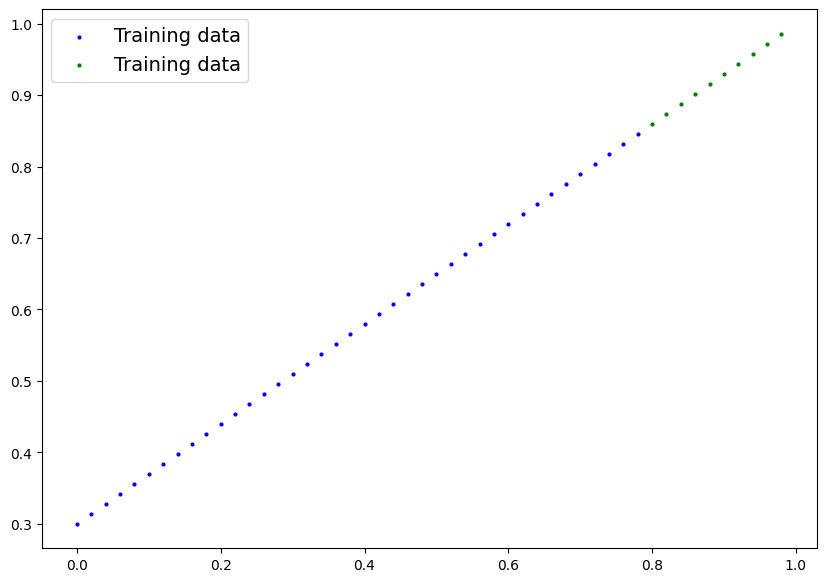

In [ ]:
plot_predictions()

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float),
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model

    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data training/testing features
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)




In [ ]:
# creating a random seed
torch.manual_seed(seed = 42)

#creating an instance of the model
model_0 = LinearRegressionModel()

#checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List of named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
### Making predictions
with torch.inference_mode():
  y_pred = model_0(x_test)

# Note: in older PyTorch code torch.no_grad() was used but inference_mode() is prefered
# with torch.no_grad():
#   y_preds = model_0(X_test)
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_pred)}")
print(f"prediction = ${y_pred}")
print(f"actual = ${y_test}")


Number of testing samples: 10
Number of predictions made: 10
prediction = $tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
actual = $tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


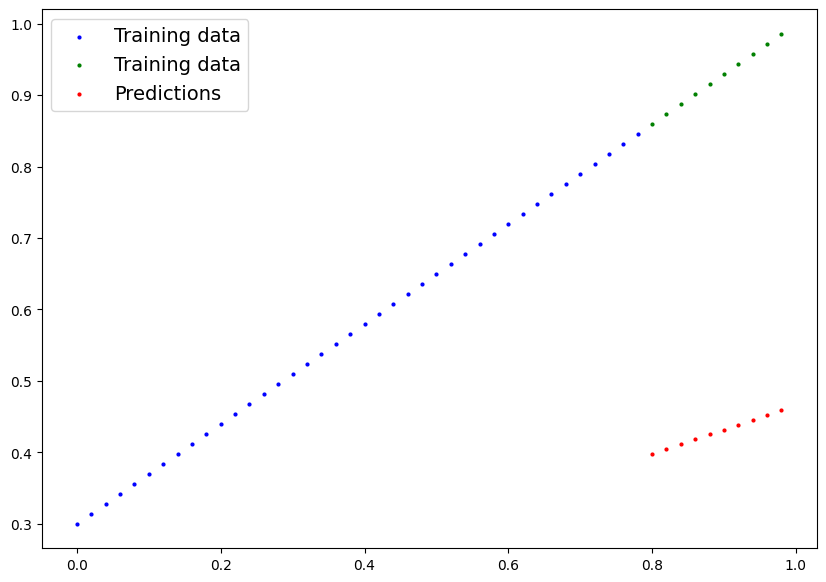

In [ ]:
plot_predictions(predictions = y_pred)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.


* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.


Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve.

And specifically for pytorch we need:


*   A training loop
*   A testing loop




In [ ]:
# Creating Loss function
loss_fn = nn.L1Loss() #  Mean Absolute Error (MAE) loss is same as L1Loss

#Creating an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),# parameters of target model to optimize
                            lr=0.001)# learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))


## Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do ....
1. Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

def train_and_test_model(it):
  # an epoch is one loop through the data (it is a hyperparameter i.e., setby us)
  epochs = it # no.of times it will iterate.
  # 0. Loop through the data
  for epoch in range(epochs):

    #Seting it to training mode
    model_0.train()

    # 1. emplenting forward pass
    y_pred_new = model_0(x_train)

    #2. Calulate the loss
    loss = loss_fn(y_pred_new,y_train)
    # print(f"current loss = {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4.perform backpropagation on the loss with respect to the parametes of the model
    loss.backward()

    # 5. step the optimizer (perform gradient desent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so,
                    # we have to zero it in the step 3 above

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

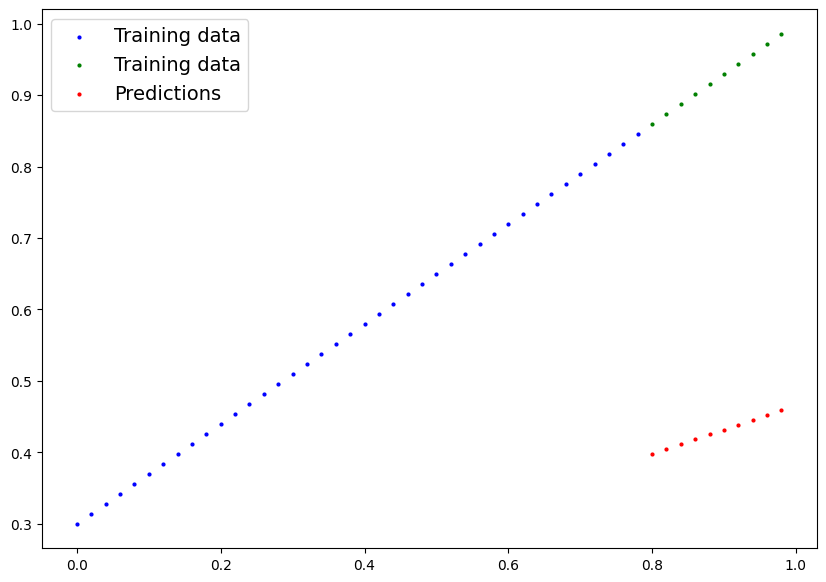

In [ ]:
# initial Predictions
plot_predictions(predictions = y_pred)

In [ ]:
train_and_test_model(1700)

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4931890368461609 
Epoch: 10 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4797181189060211 
Epoch: 20 | MAE Train Loss: 0.28983938694000244 | MAE Test Loss: 0.4662471413612366 
Epoch: 30 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.4527761936187744 
Epoch: 40 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.43930521607398987 
Epoch: 50 | MAE Train Loss: 0.2552763819694519 | MAE Test Loss: 0.4258342385292053 
Epoch: 60 | MAE Train Loss: 0.24375538527965546 | MAE Test Loss: 0.41236335039138794 
Epoch: 70 | MAE Train Loss: 0.232234388589859 | MAE Test Loss: 0.398892343044281 
Epoch: 80 | MAE Train Loss: 0.22071340680122375 | MAE Test Loss: 0.38542139530181885 
Epoch: 90 | MAE Train Loss: 0.2091923952102661 | MAE Test Loss: 0.3719504475593567 
Epoch: 100 | MAE Train Loss: 0.19767141342163086 | MAE Test Loss: 0.35847947001457214 
Epoch: 110 | MAE Train Loss: 0.18615040183067322 | MAE Test Loss: 0.

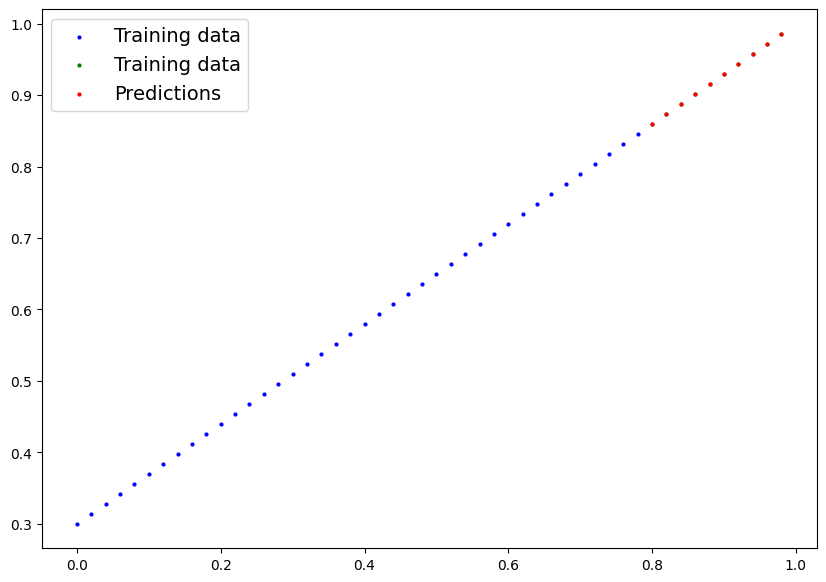

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(x_test)
plot_predictions(predictions = y_pred_new)

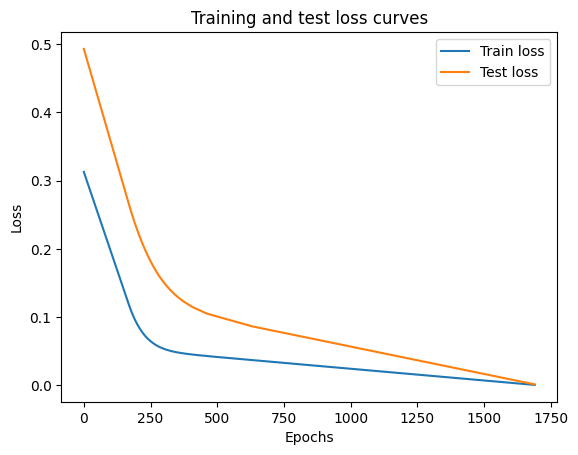

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();